In [2]:
import pandas as pd

file_path = '../data/data_FINAL_merged_variable_panel_data.csv'
df = pd.read_csv(file_path)
df.head()

,Year,IDRSSD,RCFD2170,RCFD3368,RCON3387,RCON1763,RCON5570,RCON5571,RCON5572,RCON5573,RCON5574,RCON5575
0,2001,37,NaN,NaN,734.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,242,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2001,279,NaN,NaN,511.0,NaN,7.0,216.0,2.0,292.0,0.0,0.0
3,2001,354,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2001,439,NaN,NaN,20426.0,NaN,484.0,8096.0,59.0,6063.0,13.0,3410.0


In [ ]:
import os
import matplotlib.pyplot as plt

plt.rcParams['text.usetex']  = False  
plt.rcParams['font.family']  = 'serif'  

# Define variable names 
# The name of the variable (e.g., RCON5574) and the full name from the call report (e.g., Number of Loans with original amount 250K-1000K)
variable_names = {
    'RCFD2170': r'[RCFD2170] Total Assets (\$1B)',
    'RCON3387': r'[RCON3387] Loans in Domestic Offices: Commercial and Industrial Loans (Quarterly Average) (\$1B)',
    'RCFD3368': r'[RCFD3368] Total Assets (Quarterly Average) (\$1B)',
    'RCON1763': r'[RCON1763] Commercial and Industrial Loans to U.S. Addressees, Domestic Offices (\$1B)',
    'RCON5570': r'[RCON5570] Number of Loans to U.S. Addressees with Original Amounts $\leq$ \$100K (1M)',
    'RCON5571': r'[RCON5571] Outstanding Amount of Loans to U.S. Addressees with Original Amounts $\leq$ \$100K (\$1B)',
    'RCON5572': r'[RCON5572] Number of Loans to U.S. Addressees with Original Amounts \$100K—\$250K (1M)',
    'RCON5573': r'[RCON5573] Outstanding Amount of Loans to U.S. Addressees with Original Amounts \$100K—\$250K (\$1B)',
    'RCON5574': r'[RCON5574] Number of Loans to U.S. Addressees with Original Amounts \$250K—\$1M (1M)',
    'RCON5575': r'[RCON5575] Outstanding Amount of Loans to U.S. Addressees with Original Amounts \$250K—\$1M (\$1B)'
}

# Short names for PDF filenames
short_names = {
    'RCFD2170': 'Total_Assets',
    'RCON3387': 'Domestic_Office_CI_Loans',        # Domestic Office Commercial and Industrial Loans
    'RCFD3368': 'Total_Assets_Quarterly_Avg',
    'RCON1763': 'CI_Loans_US_Addressees',          # C&I Loans to U.S. Addressees
    'RCON5570': 'Num_Loans_LE_100K',               # Number of Loans ≤ 100K
    'RCON5571': 'Outstanding_LE_100K',             # Outstanding Amount ≤ 100K
    'RCON5572': 'Num_Loans_100K_250K',             # Number of Loans 100K–250K
    'RCON5573': 'Outstanding_100K_250K',           # Outstanding Amount 100K–250K
    'RCON5574': 'Num_Loans_250K_1M',               # Number of Loans 250K–1M
    'RCON5575': 'Outstanding_250K_1M'              # Outstanding Amount 250K–1M
}

In [ ]:
# Aggregate across all banks in each period
aggregated_df = df.drop(columns=['IDRSSD']).groupby('Year').sum(numeric_only=True)

aggregated_data_file = os.path.join('../data', 'data_for_figure_C&I_lending_trends.csv')
aggregated_df.to_csv(aggregated_data_file)

# Convert units (to avoid overly large y-axis values) and manually adjust y-axis labels (see in variable names)
# Amount data unit: 1K -> 1B
# Count data unit: 1 -> 1M
aggregated_df = aggregated_df / 1_000_000

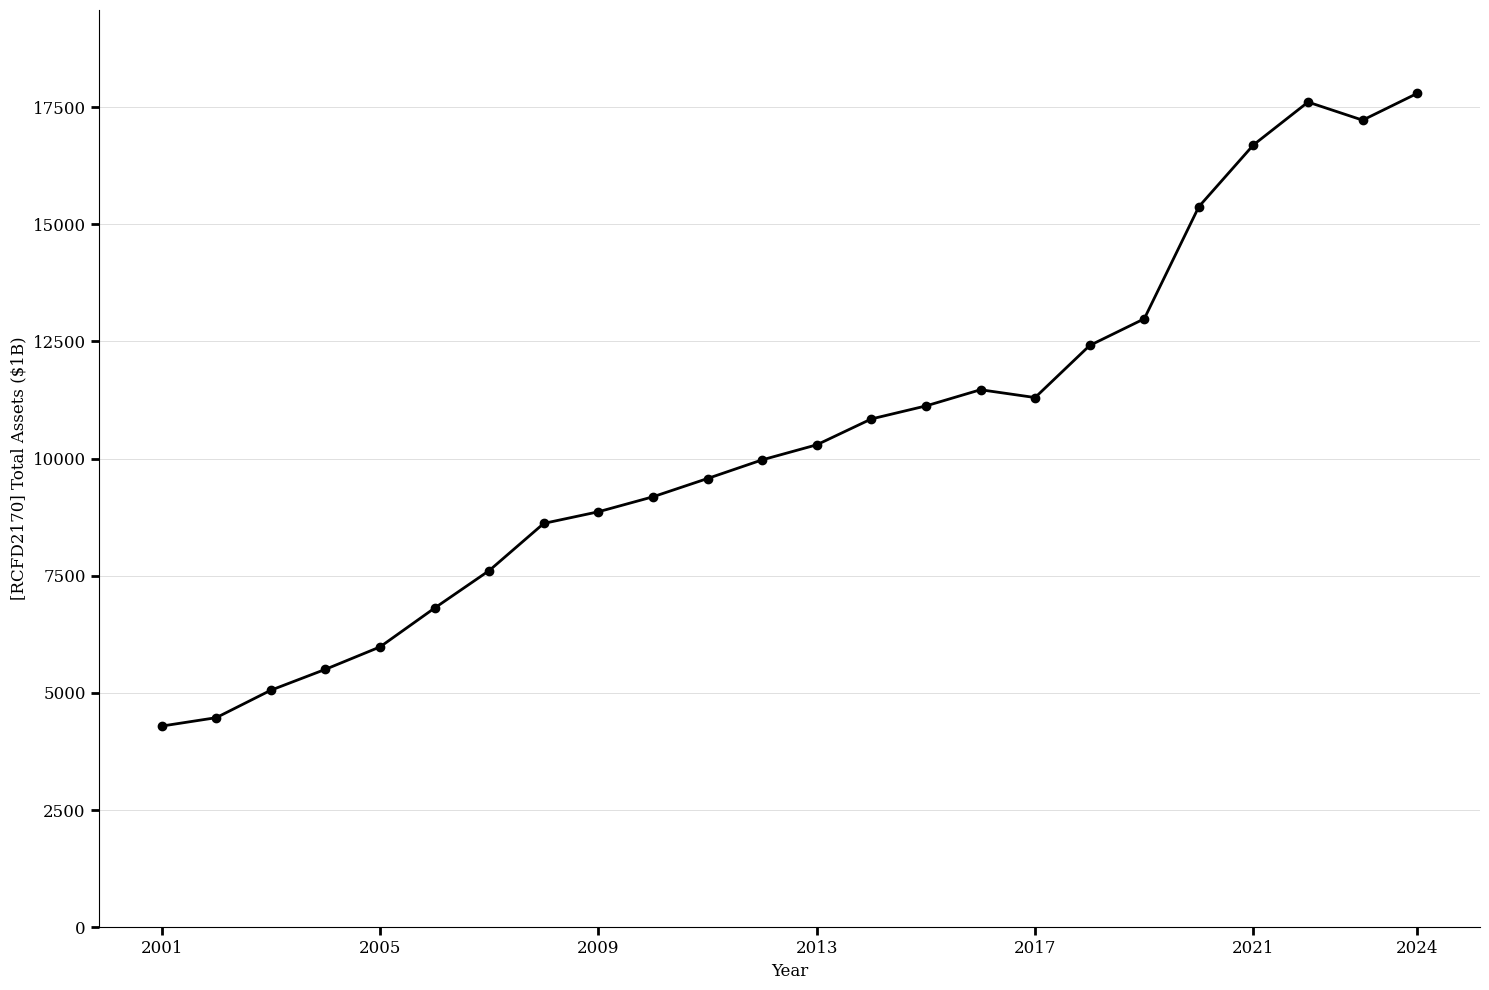

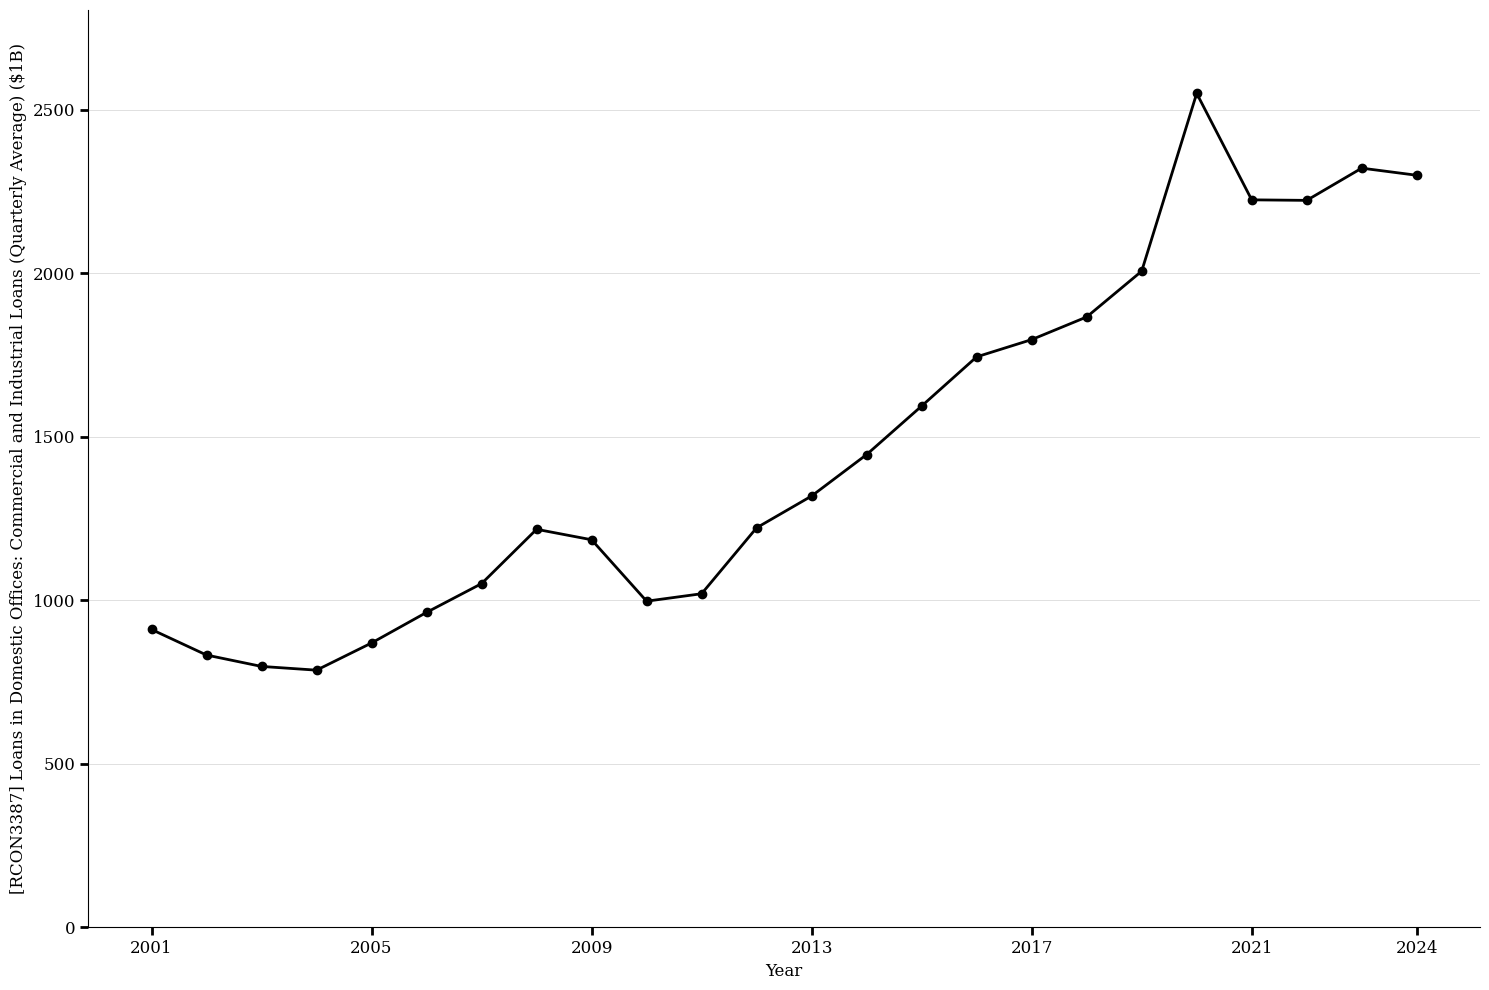

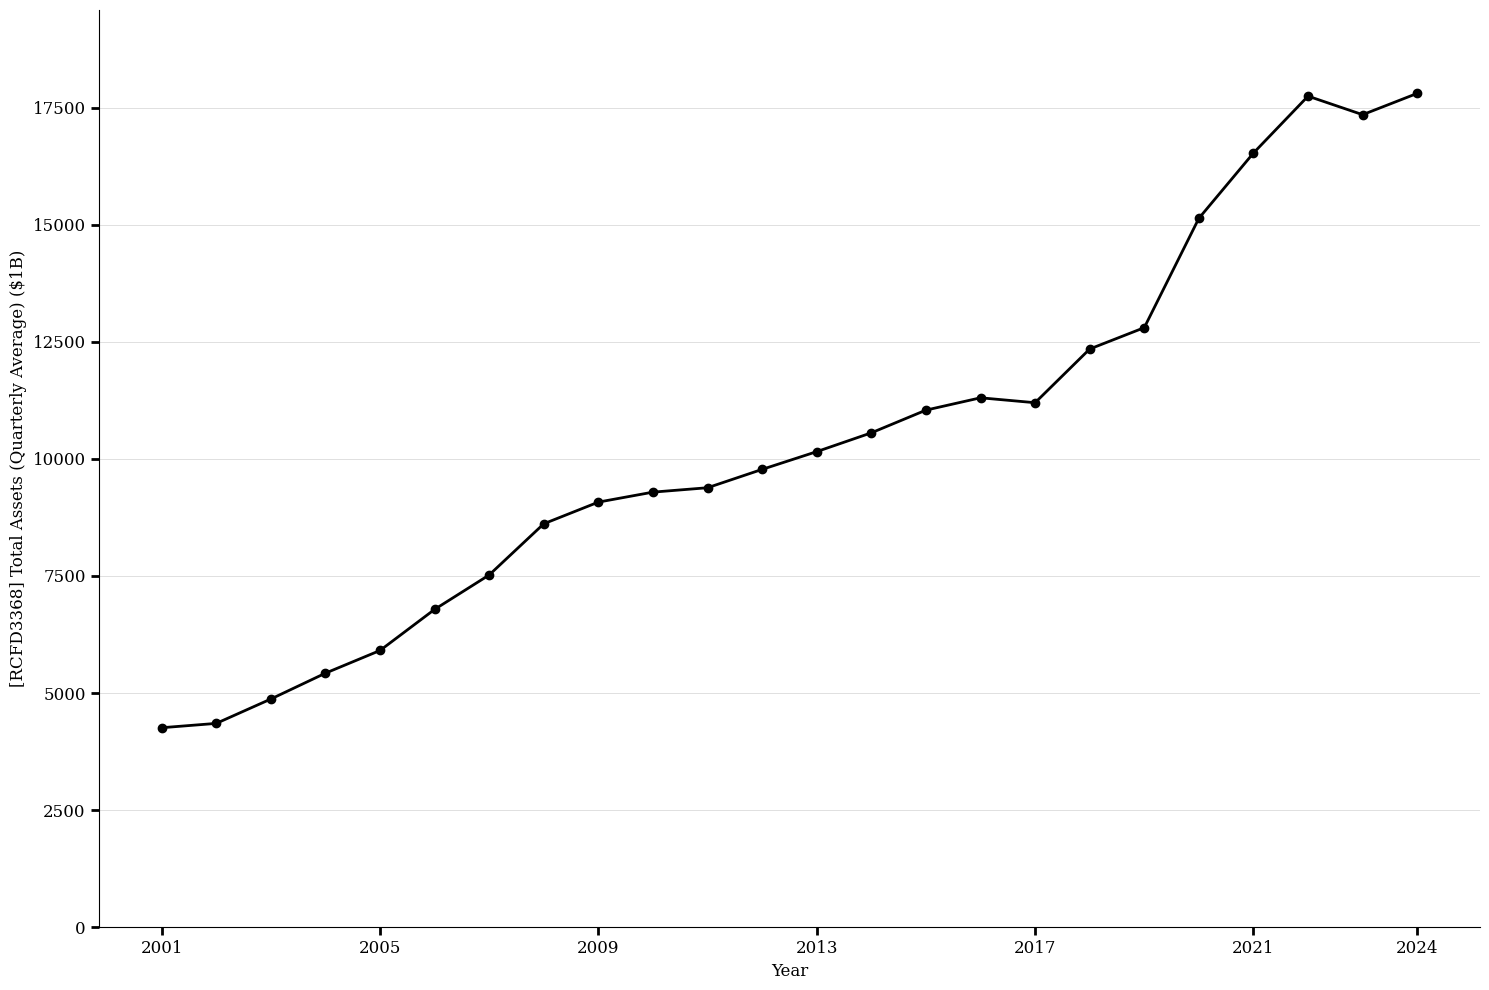

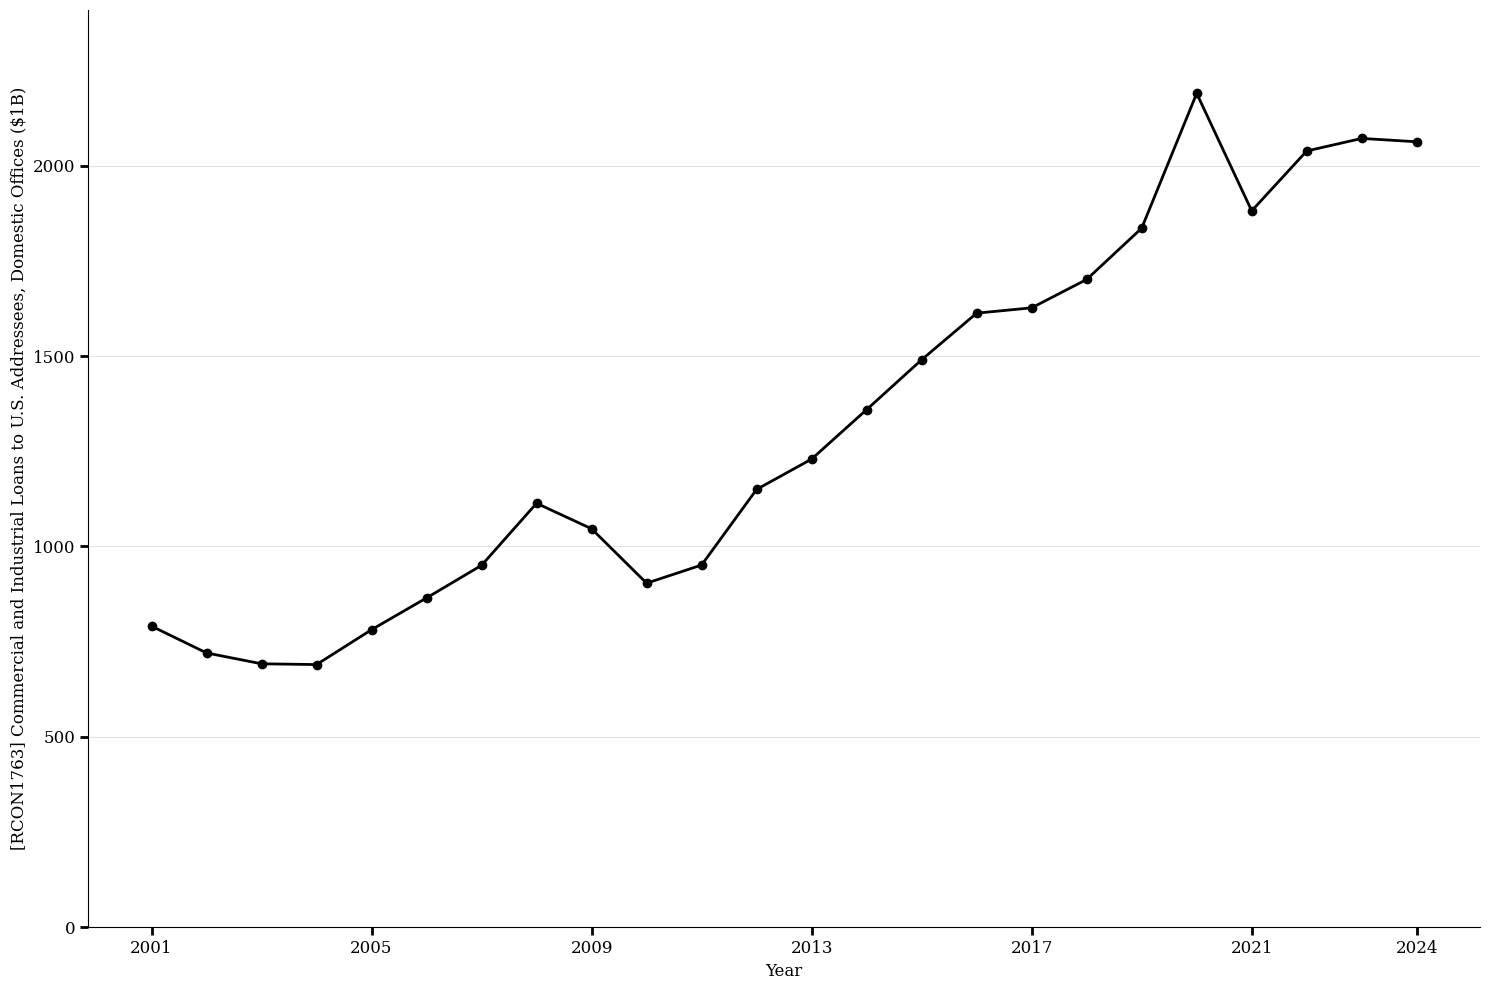

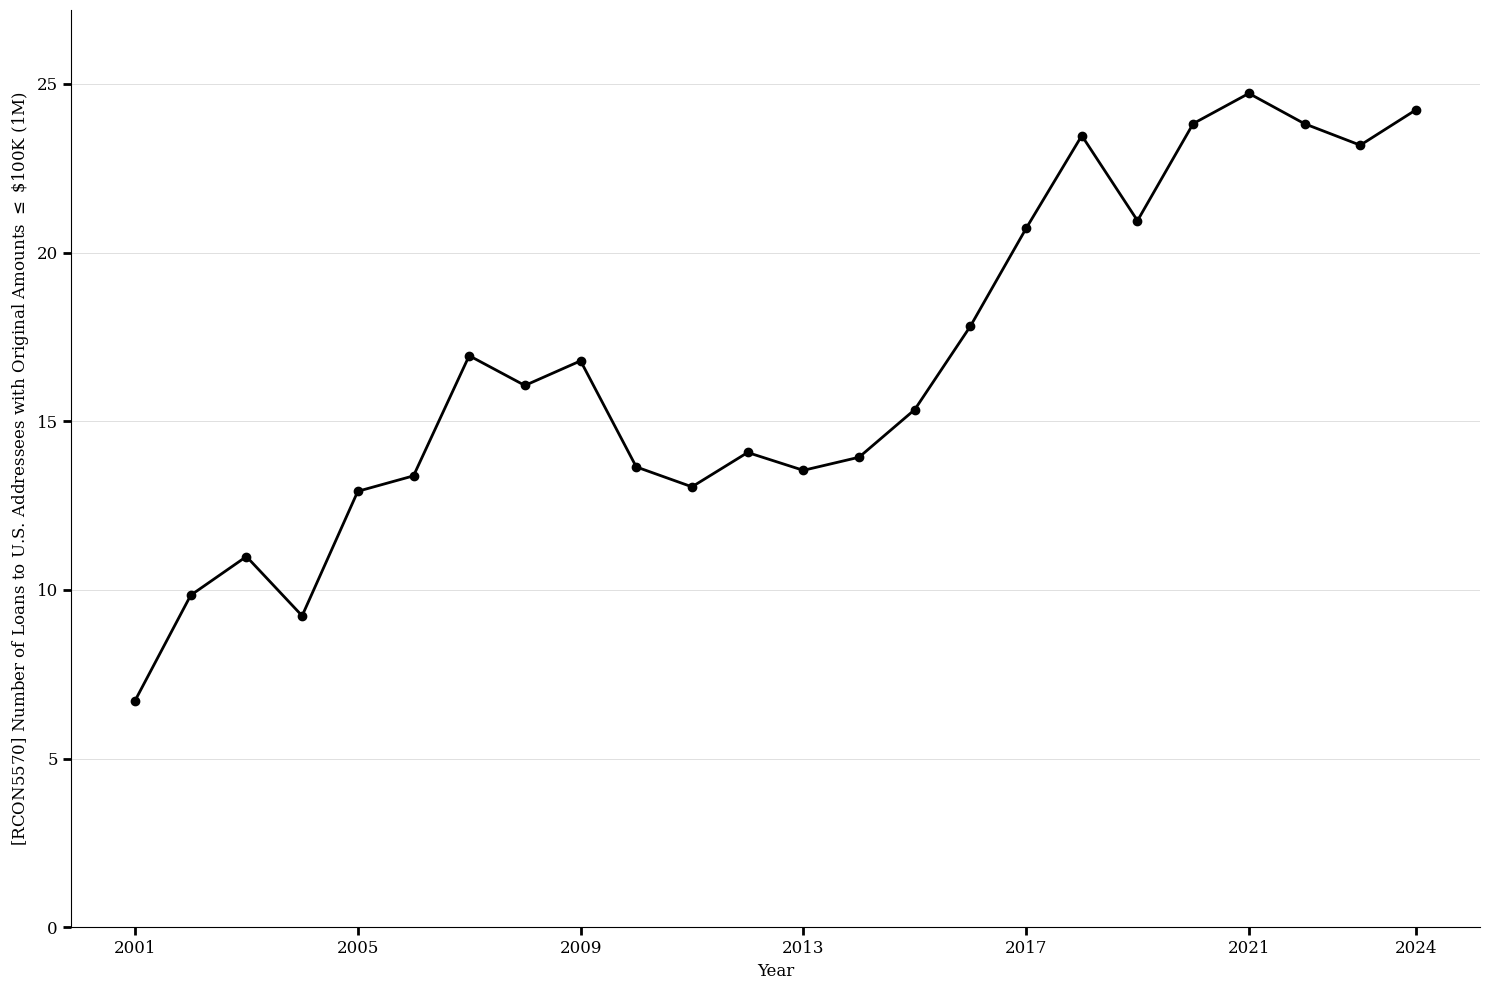

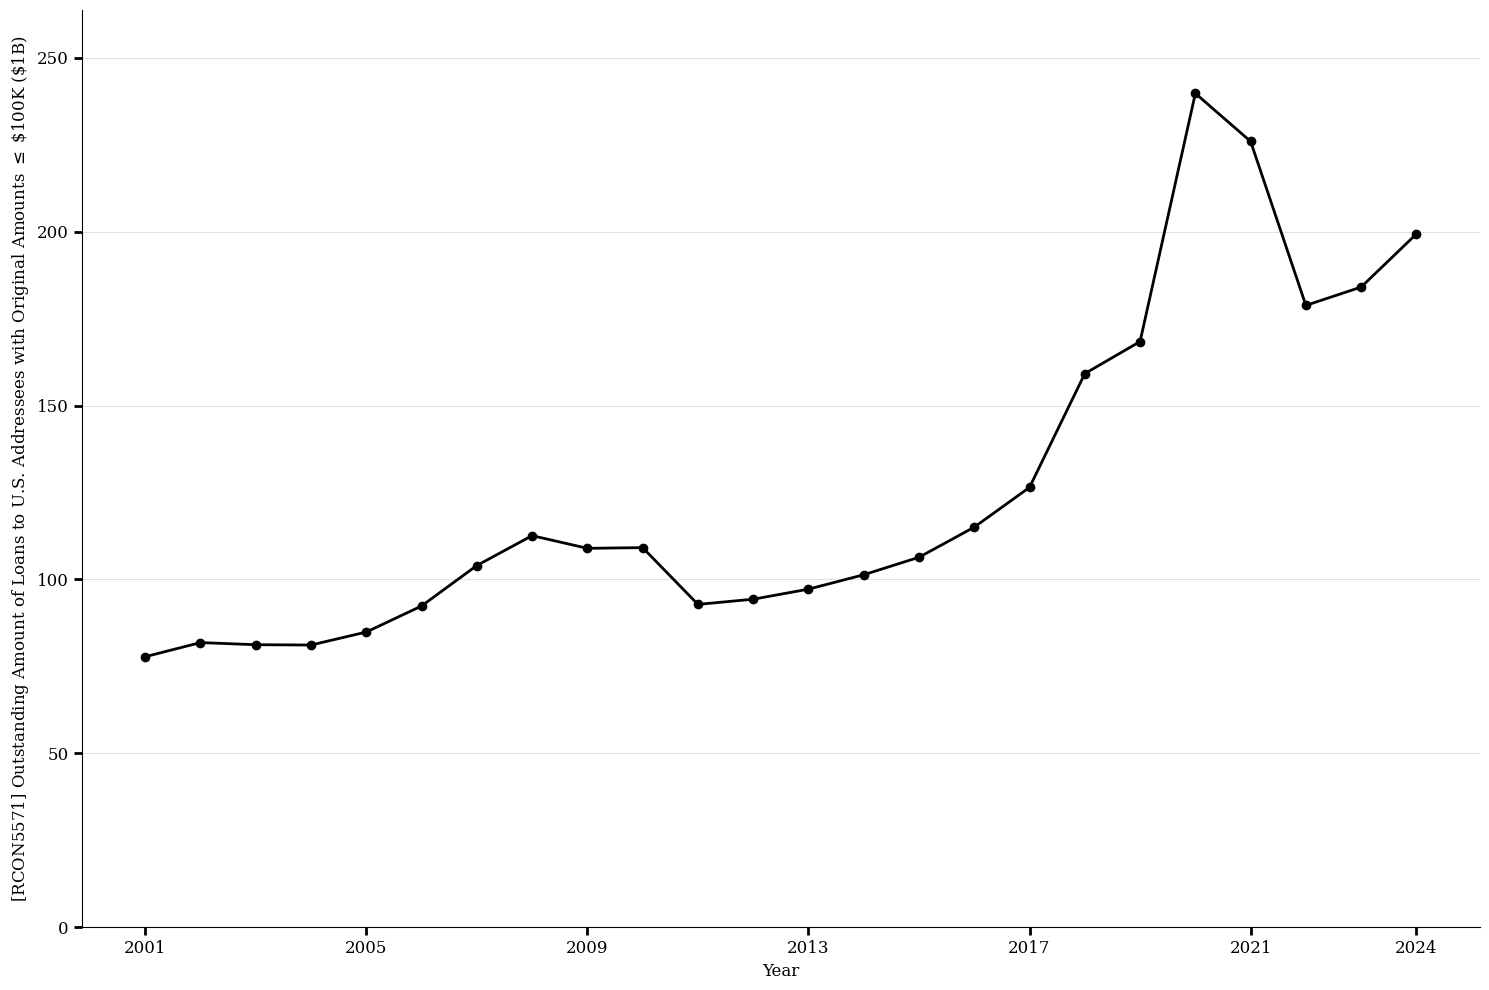

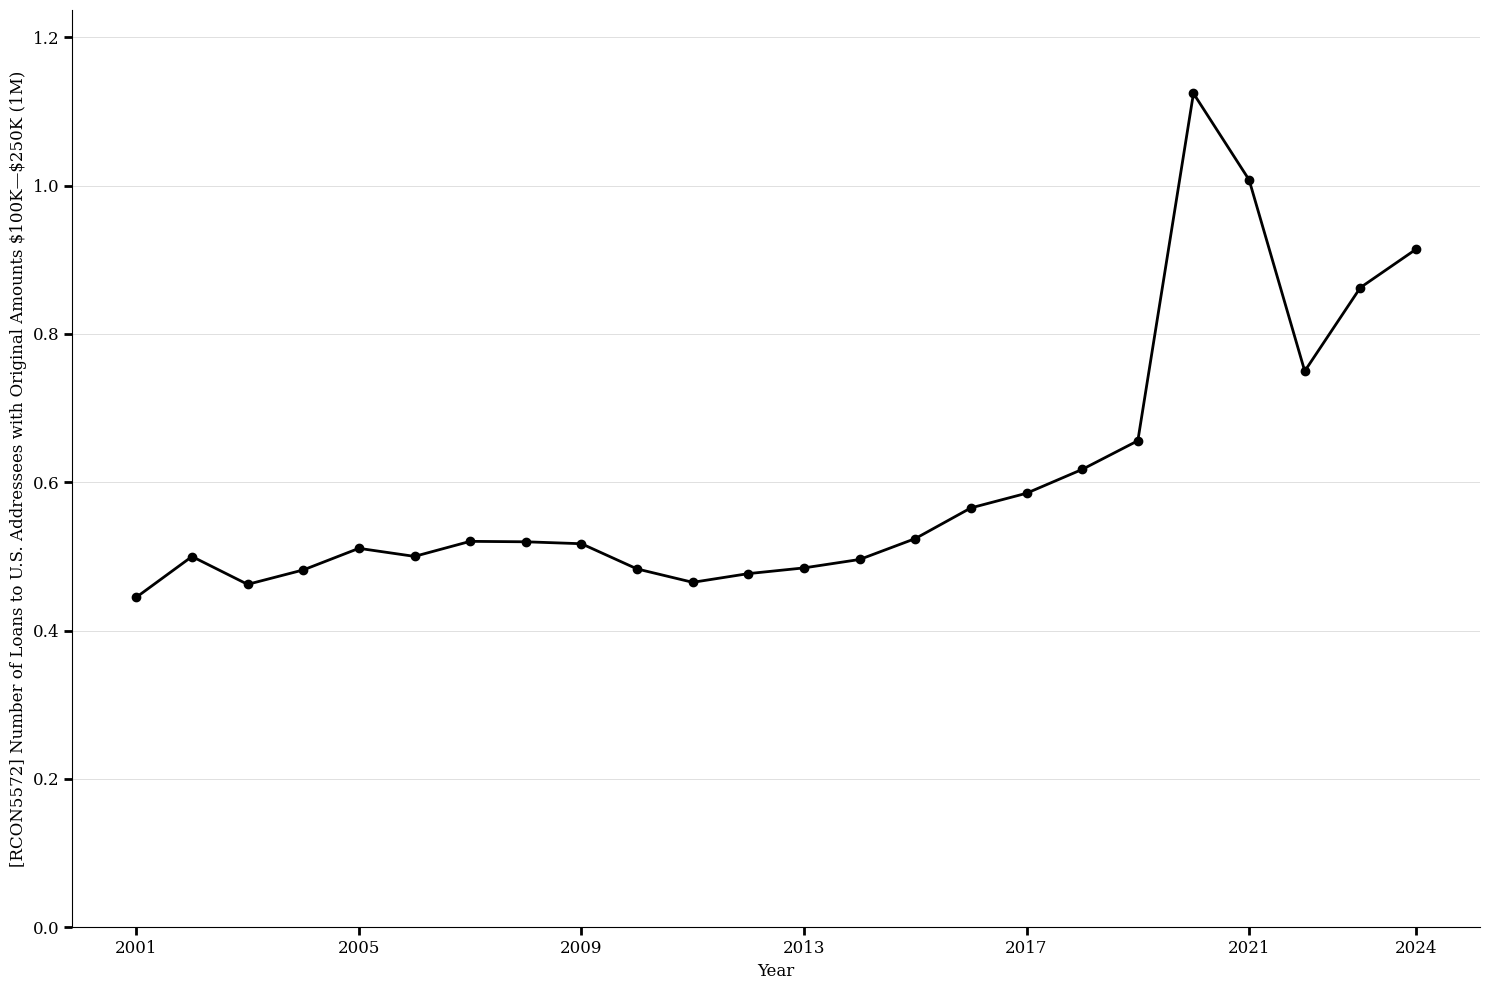

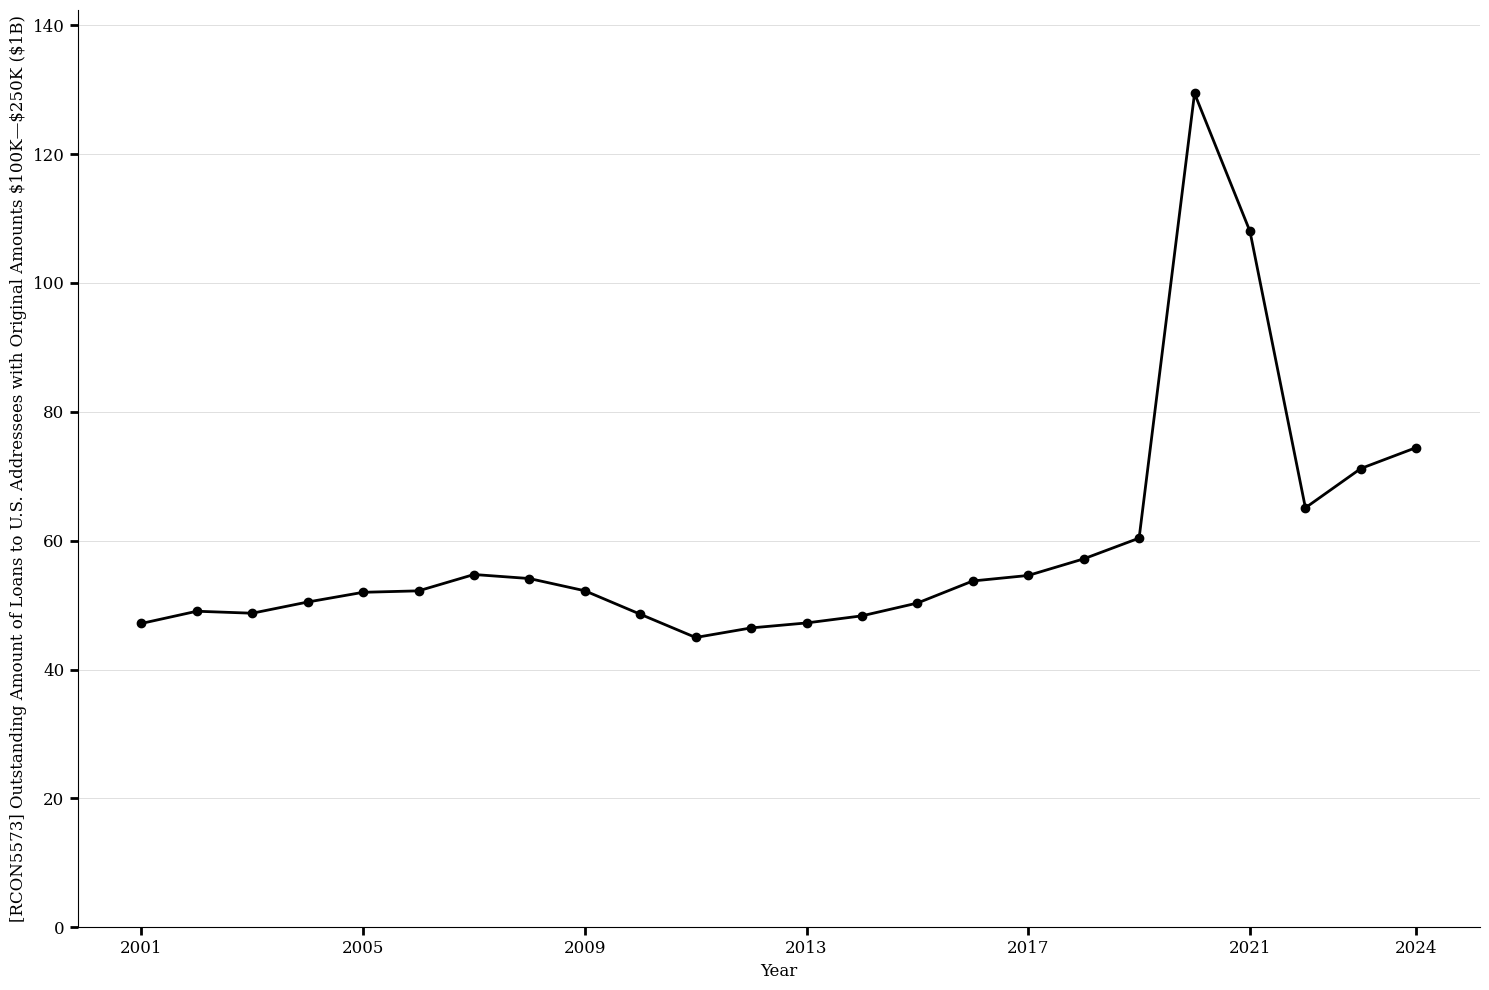

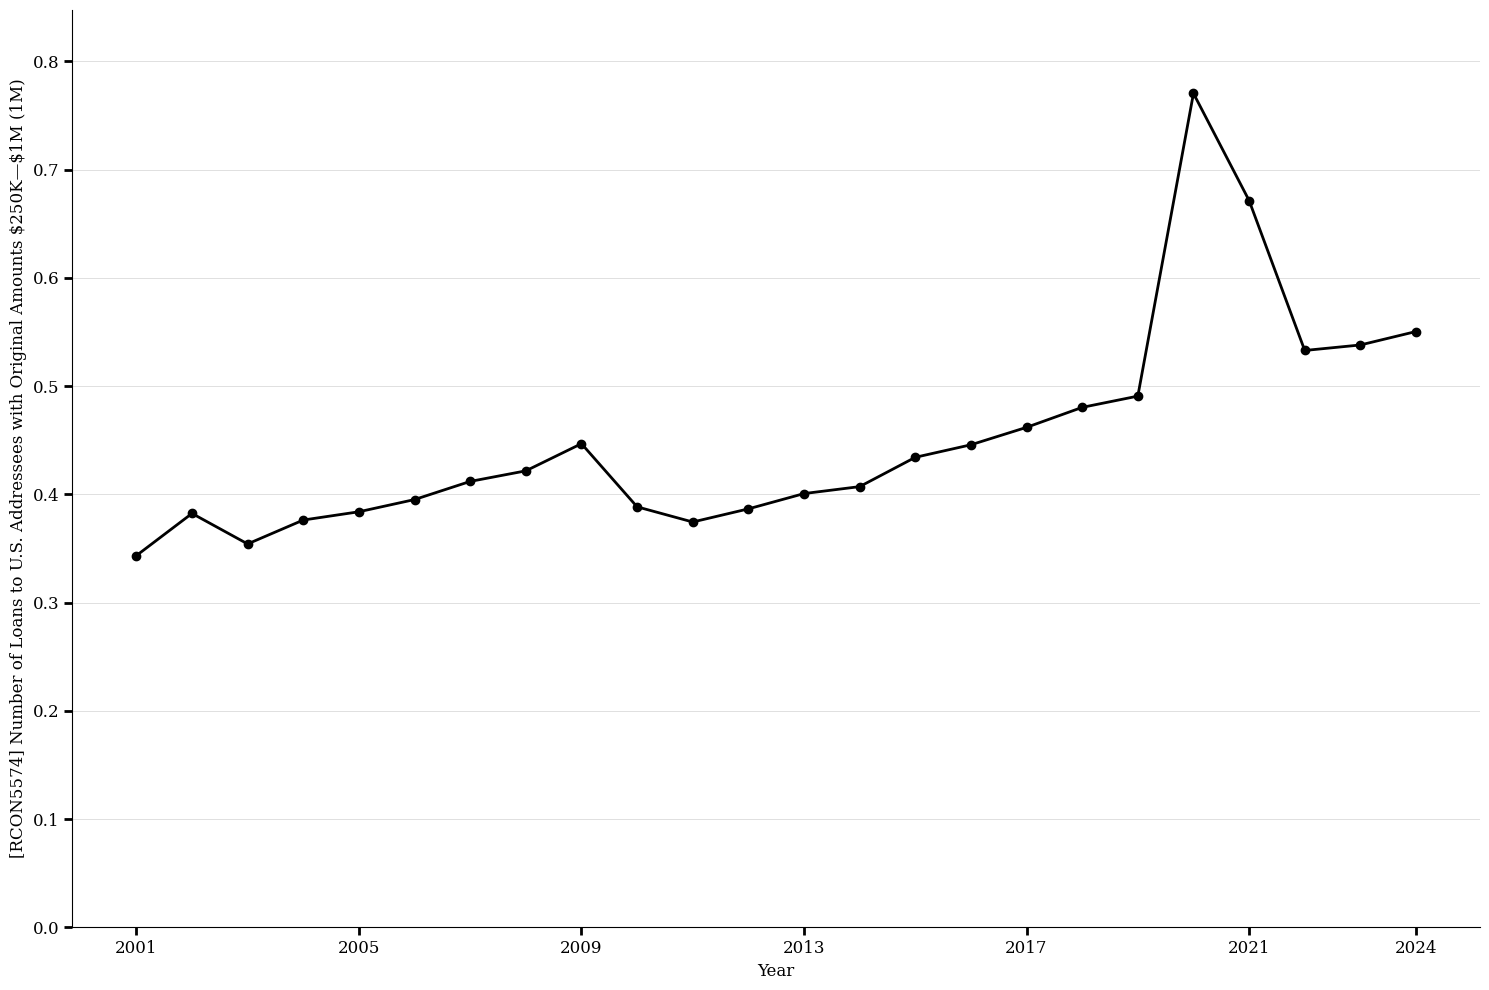

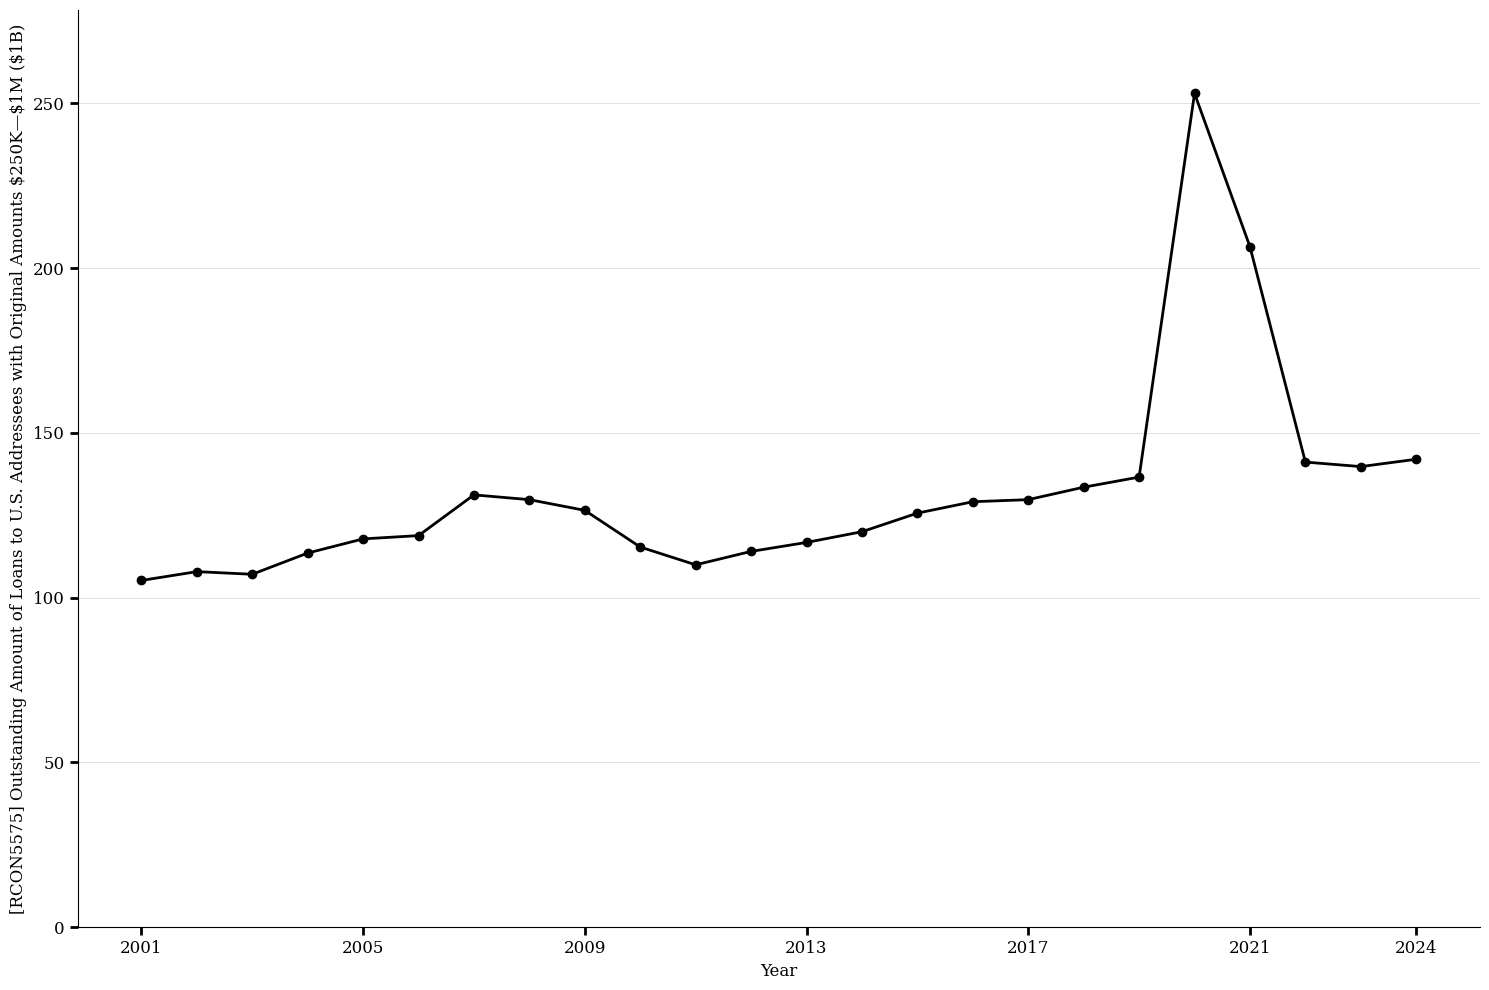

In [9]:
output_folder = '../figures'
os.makedirs(output_folder, exist_ok=True)

# Produce charts for the above variables aggregated at the bank level in each period
for var_code, var_full_name in variable_names.items():
    if var_code in aggregated_df.columns:
        plt.figure(figsize=(15, 10))  
        plt.plot(
            aggregated_df.index,       # X-axis: Years
            aggregated_df[var_code],   # Y-axis: Aggregated values
            marker     = 'o',          
            linestyle  = '-',         
            color      = 'black',      
            linewidth  = 2,            
            markersize = 6             
        )
        plt.xlabel(r'Year', fontsize=12)            # X-axis label
        plt.ylabel(f'{var_full_name}', fontsize=12) # Y-axis label

        plt.grid(True, axis='y', linestyle='-', linewidth=0.5, color='lightgray')

        ax = plt.gca()  
        ax.yaxis.get_major_formatter().set_scientific(False)  # Disable scientific notation for y-axis
        ax.ticklabel_format(style='plain', axis='y')         

        # Set x-ticks every 4 years, ensuring 2001 and 2024 are included
        xticks = list(range(2001, 2025, 4))
        if 2001 not in xticks:
            xticks.insert(0, 2001)
        if 2024 not in xticks:
            xticks.append(2024)
        ax.set_xticks(xticks)

        ax.tick_params(            
            axis      = 'both',    
            direction = 'out',     
            length    = 6,          
            width     = 2,         
            colors    = 'black',   
            labelsize = 12         
        )

        # Scale the y-axis to improve readability
        plt.ylim(bottom=0, top=aggregated_df[var_code].max() * 1.1)

        ax.spines['top'].set_visible(False)   
        ax.spines['right'].set_visible(False) 

        plt.tight_layout()  

        # Save figure as PDF, format: Figure_<VariableCode>_<ShortName>.pdf
        short_name = short_names.get(var_code)
        filename = os.path.join(output_folder, f'figure_{var_code}_{short_name}.pdf')
        plt.savefig(filename, format='pdf')  

        plt.show()  